In [1]:
# Import necessary libraries
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load SQL extension
%load_ext sql

In [3]:
# Connect to SQLite database
con = sqlite3.connect("BudgetData.db")
cur = con.cursor()

In [4]:
# Set up connection to SQLite database for SQL magic
%sql sqlite:///BudgetData.db

## Define SQL queries to create tables and insert data


In [6]:
# Create Transactions table
%%sql
DROP TABLE IF EXISTS Transactions;
CREATE TABLE Transactions (
    Transcations_Id INTEGER PRIMARY KEY,
    ExpenseOrIncome VARCHAR(20),
    Amount REAL,
    Date DATE,
    Categories_Id INTEGER,
    Users_Id INTEGER,
    FOREIGN KEY (Categories_Id) REFERENCES Expense_Categories(Categories_Id),
    FOREIGN KEY (Users_Id) REFERENCES Users(Users_Id)
);

/* Create Expense_Categories table */
DROP TABLE IF EXISTS Expense_Categories;
CREATE TABLE Expense_Categories (
    Categories_Id INTEGER PRIMARY KEY,
    Name TEXT
);

/* Create Users table */
DROP TABLE IF EXISTS Users;
CREATE TABLE Users (
    Users_Id INTEGER PRIMARY KEY,
    Username CHAR(40),
    Password CHAR(10)
);

 * sqlite:///BudgetData.db
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [7]:
# Insert data into tables
%%sql
INSERT INTO Transactions (Transcations_Id, ExpenseOrIncome, Amount, Date, Categories_Id, Users_Id) VALUES
(1, 'expense', 50.00, '2024-05-01', 11, 21),
(2, 'expense', 100.00, '2024-05-03', 12, 22),
(3, 'income', 500.00, '2024-05-05', NULL, 21),
(4, 'expense', 30.00, '2024-05-08', 13, 23),
(5, 'expense', 20.00, '2024-05-08', 14, 22),
(6, 'expense', 75.50, '2024-05-02', 15, 23),
(7, 'income', 600.00, '2024-05-04', NULL, 22),
(8, 'expense', 45.00, '2024-05-06', 11, 21),
(9, 'income', 200.00, '2024-05-07', NULL, 22),
(10, 'expense', 25.75, '2024-05-07', 14, 22);

INSERT INTO Expense_Categories (Categories_Id, Name) VALUES
(11, 'Groceries'),
(12, 'Utilities'),
(13, 'Entertainment'),
(14, 'Transportation'),
(15, 'Healthcare');

INSERT INTO Users (Users_Id, Username, Password) VALUES
(21, 'user1', 'password1'),
(22, 'user2', 'password2'),
(23, 'user3', 'password3');

 * sqlite:///BudgetData.db
10 rows affected.
5 rows affected.
3 rows affected.


[]

## SQL queries to check table structure and data

In [8]:
# Check tables in the database
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///BudgetData.db
Done.


name
Transactions
Expense_Categories
Users


In [9]:
# Check structure of Transactions table
%sql PRAGMA table_info(Transactions);

 * sqlite:///BudgetData.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Transcations_Id,INTEGER,0,None,1
1,ExpenseOrIncome,VARCHAR(20),0,None,0
2,Amount,REAL,0,None,0
3,Date,DATE,0,None,0
4,Categories_Id,INTEGER,0,None,0
5,Users_Id,INTEGER,0,None,0


In [10]:
# Check structure of Expense_Categories table
%sql PRAGMA table_info(Expense_Categories);

 * sqlite:///BudgetData.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Categories_Id,INTEGER,0,None,1
1,Name,TEXT,0,None,0


In [11]:
# Check structure of Users table
%sql PRAGMA table_info(Users);

 * sqlite:///BudgetData.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Users_Id,INTEGER,0,None,1
1,Username,CHAR(40),0,None,0
2,Password,CHAR(10),0,None,0


In [12]:
# Check first 3 rows of Transactions table
%sql SELECT * FROM Transactions Limit 3;

 * sqlite:///BudgetData.db
Done.


Transcations_Id,ExpenseOrIncome,Amount,Date,Categories_Id,Users_Id
1,expense,50.0,2024-05-01,11,21
2,expense,100.0,2024-05-03,12,22
3,income,500.0,2024-05-05,None,21


In [13]:
# Check first 3 rows of Expense_Categories table
%sql SELECT * FROM Expense_Categories;

 * sqlite:///BudgetData.db
Done.


Categories_Id,Name
11,Groceries
12,Utilities
13,Entertainment
14,Transportation
15,Healthcare


In [14]:
# Check first 3 rows of Users table
%sql SELECT * FROM Users;

 * sqlite:///BudgetData.db
Done.


Users_Id,Username,Password
21,user1,password1
22,user2,password2
23,user3,password3


## Analysis Section

### Expense Analysis

*   What is the total amount spent on expenses?
*   Which category has the highest total expenses?
*   What is the average amount spent per expense transaction?

In [19]:
# Total amount spent on expenses
%sql SELECT SUM(Amount) AS Total_Expenses_Amount FROM Transactions WHERE ExpenseOrIncome = "expense";

 * sqlite:///BudgetData.db
Done.


Total_Expenses_Amount
346.25


In [16]:
# Category with the highest total expenses
%%sql
SELECT T.Transcations_Id, EC.Categories_Id, EC.Name, SUM(T.Amount) AS "SumOfAmount"
FROM Expense_Categories AS EC
LEFT OUTER JOIN Transactions AS T
ON T.Categories_Id = EC.Categories_Id
GROUP BY EC.Name
ORDER BY SumOfAmount DESC
LIMIT 1;

 * sqlite:///BudgetData.db
Done.


Transcations_Id,Categories_Id,Name,SumOfAmount
2,12,Utilities,100.0


In [17]:
# Average amount spent per expense transaction
%%sql
SELECT ExpenseOrIncome, Round(AVG(Amount),2) AS AVG_Amount
FROM Transactions
WHERE ExpenseOrIncome = "expense";

 * sqlite:///BudgetData.db
Done.


ExpenseOrIncome,AVG_Amount
expense,49.46


### Income Analysis:

*   What is the total income earned?
*   How does the expense compare to income (By Percentage)?
*   Is there any trend in the income over time?

In [18]:
# Total income earned
%sql SELECT SUM(Amount) AS Total_Income FROM Transactions WHERE ExpenseOrIncome = "income";

 * sqlite:///BudgetData.db
Done.


Total_Income
1300.0


In [20]:
# Expense compared to income (Percentage)
%%sql
SELECT ROUND((TotalExpense / TotalIncome) * 100, 2) || '%' AS PercentageSpentOnExpenses
FROM (
    SELECT
        (SELECT SUM(Amount) FROM Transactions WHERE ExpenseOrIncome = 'income') AS TotalIncome,
        (SELECT SUM(Amount) FROM Transactions WHERE ExpenseOrIncome = 'expense') AS TotalExpense
);

 * sqlite:///BudgetData.db
Done.


PercentageSpentOnExpenses
26.63%


In [21]:
# Trend in income over time
%%sql
SELECT Date, SUM(Amount) as TotalIncome
FROM Transactions
WHERE ExpenseOrIncome = "income"
GROUP BY Date
ORDER BY Date;

 * sqlite:///BudgetData.db
Done.


Date,TotalIncome
2024-05-04,600.0
2024-05-05,500.0
2024-05-07,200.0


###Category Analysis:

*   Which category has the highest and lowest spending?
*   What is the distribution of spending across different categories over total income?
*   Are there any categories where spending has significantly increased or decreased over time?

In [22]:
# Category with highest and lowest spending
%%sql
WITH CategorySpending AS (
    SELECT EC.Name, SUM(T.Amount) AS TotalAmount
    FROM Expense_Categories AS EC
    LEFT JOIN Transactions AS T ON EC.Categories_Id = T.Categories_Id
    GROUP BY EC.Name
)
SELECT
    (SELECT Name FROM CategorySpending WHERE TotalAmount = (SELECT MAX(TotalAmount) FROM CategorySpending)) AS HighestSpendingCategory,
    (SELECT MAX(TotalAmount) FROM CategorySpending) AS HighestSpendingAmount,
    (SELECT Name FROM CategorySpending WHERE TotalAmount = (SELECT MIN(TotalAmount) FROM CategorySpending)) AS LowestSpendingCategory,
    (SELECT MIN(TotalAmount) FROM CategorySpending) AS LowestSpendingAmount;

 * sqlite:///BudgetData.db
Done.


HighestSpendingCategory,HighestSpendingAmount,LowestSpendingCategory,LowestSpendingAmount
Utilities,100.0,Entertainment,30.0


In [23]:
# Distribution of spending across different categories over total income
%%sql
SELECT
    EC.Name AS Category,
    SUM(T.Amount) AS TotalAmount,
    ROUND((SUM(Amount) / (SELECT SUM(Amount) FROM Transactions WHERE ExpenseOrIncome = "income")) * 100, 2) || '%' AS SpendingPercentage
FROM Expense_Categories AS EC
LEFT JOIN Transactions AS T ON EC.Categories_Id = T.Categories_Id
GROUP BY EC.Name
ORDER BY SpendingPercentage DESC;

 * sqlite:///BudgetData.db
Done.


Category,TotalAmount,SpendingPercentage
Utilities,100.0,7.69%
Groceries,95.0,7.31%
Healthcare,75.5,5.81%
Transportation,45.75,3.52%
Entertainment,30.0,2.31%


In [24]:
# Spending patterns over time

%%sql
SELECT
    EC.Name AS Category,
    T.Date AS TransactionDate,
    SUM(T.Amount) AS TotalAmount
FROM Expense_Categories AS EC
LEFT JOIN Transactions AS T ON EC.Categories_Id = T.Categories_Id
GROUP BY EC.Name, T.Date
ORDER BY EC.Name, T.Date;

 * sqlite:///BudgetData.db
Done.


Category,TransactionDate,TotalAmount
Entertainment,2024-05-08,30.0
Groceries,2024-05-01,50.0
Groceries,2024-05-06,45.0
Healthcare,2024-05-02,75.5
Transportation,2024-05-07,25.75
Transportation,2024-05-08,20.0
Utilities,2024-05-03,100.0


###User Analysis:

*   How many users are there in the dataset?
*   What is the distribution of transactions among different users?
*   Are there any users who have exceptionally high or low spending?

In [25]:
# Number of users in the dataset
%sql SELECT COUNT(Users_Id) AS Total_Number_Of_Users FROM Users;

 * sqlite:///BudgetData.db
Done.


Total_Number_Of_Users
3


In [26]:
# Distribution of transactions among different users
%%sql
SELECT U.Users_Id, U.Username,
       SUM(Amount) AS SpendPerPerson
FROM Users AS U LEFT OUTER JOIN Transactions AS T
ON T.Users_Id = U.Users_Id
WHERE T.ExpenseOrIncome = "expense"
GROUP BY U.Users_Id;

 * sqlite:///BudgetData.db
Done.


Users_Id,Username,SpendPerPerson
21,user1,95.0
22,user2,145.75
23,user3,105.5


In [27]:
# Users with exceptionally high or low spending
%%sql
SELECT
    (SELECT U1.Username || '($ ' || SUM(T1.Amount) || ')'
     FROM Users AS U1
     LEFT JOIN Transactions AS T1 ON U1.Users_Id = T1.Users_Id
     WHERE T1.ExpenseOrIncome = 'expense'
     GROUP BY U1.Users_Id
     ORDER BY SUM(T1.Amount) DESC
     LIMIT 1) AS HighestSpender,

    (SELECT U2.Username || '($ ' || SUM(T2.Amount) || ')'
     FROM Users AS U2
     LEFT JOIN Transactions AS T2 ON U2.Users_Id = T2.Users_Id
     WHERE T2.ExpenseOrIncome = 'expense'
     GROUP BY U2.Users_Id
     ORDER BY SUM(T2.Amount) ASC
     LIMIT 1) AS LowestSpender;

 * sqlite:///BudgetData.db
Done.


HighestSpender,LowestSpender
user2($ 145.75),user1($ 95.0)


#Date Analysis:

*   How does spending vary over time (e.g., monthly, quarterly) and are there any patterns or trends in spending based on the date?

In [28]:
# Spending over time
Expense_Over_Time = %sql SELECT SUM(Amount) AS Expense_Amount, Date FROM Transactions WHERE ExpenseOrIncome = "expense" GROUP BY Date ORDER BY Date;

 * sqlite:///BudgetData.db
Done.


In [29]:
# Convert query result to DataFrame
df = Expense_Over_Time.DataFrame()

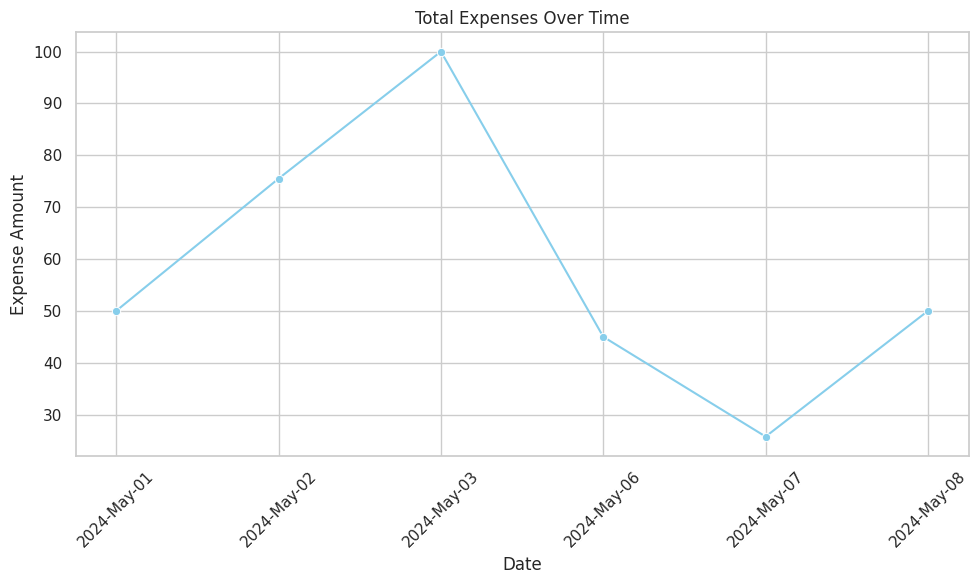

In [31]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a new column for formatted date
df['Formatted_Date'] = df['Date'].dt.strftime('%Y-%B-%d')

# Create the line plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='Formatted_Date', y='Expense_Amount', data=df, color='skyblue', marker='o')

# Set labels and title
plot.set_xlabel('Date')
plot.set_ylabel('Expense Amount')
plot.set_title('Total Expenses Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()